In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import keras
import tensorflow as tf
from keras.layers import Dense,Flatten
from keras.models import Sequential,Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import preprocess_input
from keras.applications import resnet

import pandas as pd
import os


In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function =preprocess_input )
val_datagen = ImageDataGenerator(preprocessing_function =preprocess_input )

In [ ]:
train = train_datagen.flow_from_directory(directory = "/content/drive/MyDrive/dataset/train",target_size = (256,256),batch_size=32)

val = val_datagen.flow_from_directory(directory = "/content/drive/MyDrive/dataset/valid",target_size = (256,256),batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
base_model = resnet.ResNet101(input_shape=(256,256,3),include_top=False)

In [ ]:
base_model.trainable = False

In [ ]:
# Create new model on top
inputs = keras.Input(shape=(256, 256, 3))
x = base_model(training = False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units = 38,activation = 'softmax')(X)

model = Model(base_model.input,X)

model.summary()

In [ ]:
model.compile(optimizer = 'adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor = "val_accuracy",min_delta = 0.01, patience = 3, verbose = 1)

mc = ModelCheckpoint(filepath="f_model.h5",monitor = "val_accuracy",
                     min_delta = 0.01, patience = 3, verbose = 1,
                     save_best_only=True)

cb = [es,mc]

In [ ]:
his = model.fit_generator(train,steps_per_epoch = 16,ep-ochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 32.5056 - accuracy: 0.2188 
Epoch 1: val_accuracy improved from -inf to 0.42188, saving model to f_model.h5
16/16 [==============================] - 538s 31s/step - loss: 32.5056 - accuracy: 0.2188 - val_loss: 19.4415 - val_accuracy: 0.4219
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 17.6601 - accuracy: 0.4805 
Epoch 2: val_accuracy improved from 0.42188 to 0.60156, saving model to f_model.h5
16/16 [==============================] - 472s 30s/step - loss: 17.6601 - accuracy: 0.4805 - val_loss: 8.6618 - val_accuracy: 0.6016
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 8.9789 - accuracy: 0.6289 
Epoch 3: val_accuracy improved from 0.60156 to 0.66406, saving model to f_model.h5
16/16 [==============================] - 462s 30s/step - loss: 8.9789 - accuracy: 0.6289 - val_loss: 8.3026 - val_accuracy: 0.6641
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 8.0

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

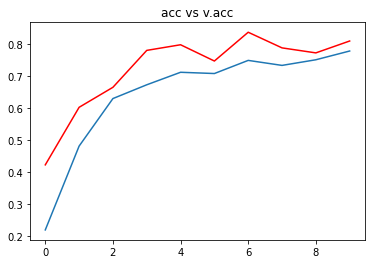

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title('acc vs v.acc')
plt.show()

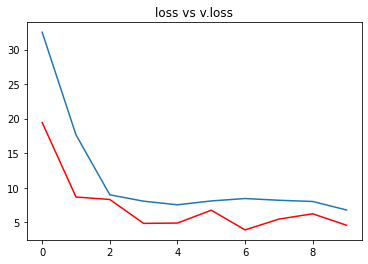

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title('loss vs v.loss')
plt.show()

In [ ]:
base_model.trainable=True
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-5),  # Low learning rate
    loss=keras.losses.categorical_crossentropy,
    metrics=["accuracy"],
)

In [ ]:

es = EarlyStopping(monitor = "val_accuracy",min_delta = 0.01, patience = 3, verbose = 1)

mc = ModelCheckpoint(filepath="j_model.h5",monitor = "val_accuracy",
                     min_delta = 0.01, patience = 3, verbose = 1,
                     save_best_only=True)

cb = [es,mc]


h1=model.fit(train,steps_per_epoch = 16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 4.3605 - accuracy: 0.7891 
Epoch 1: val_accuracy improved from -inf to 0.86523, saving model to j_model.h5
16/16 [==============================] - 400s 25s/step - loss: 4.3605 - accuracy: 0.7891 - val_loss: 3.0233 - val_accuracy: 0.8652
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 4.3852 - accuracy: 0.7812 
Epoch 2: val_accuracy improved from 0.86523 to 0.87305, saving model to j_model.h5
16/16 [==============================] - 423s 27s/step - loss: 4.3852 - accuracy: 0.7812 - val_loss: 2.9375 - val_accuracy: 0.8730
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 3.1544 - accuracy: 0.8359 
Epoch 3: val_accuracy improved from 0.87305 to 0.87500, saving model to j_model.h5
16/16 [==============================] - 376s 24s/step - loss: 3.1544 - accuracy: 0.8359 - val_loss: 3.0258 - val_accuracy: 0.8750
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 2.9239 -

In [ ]:
h2 = h1.history
h2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

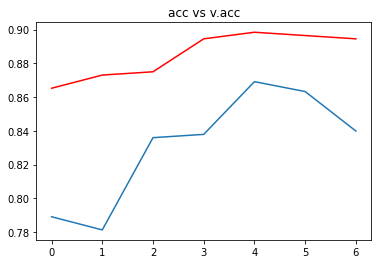

In [ ]:
plt.plot(h2['accuracy'])
plt.plot(h2['val_accuracy'],c='red')
plt.title('acc vs v.acc')
plt.show()

In [ ]:
plt.plot(h2['loss'])
plt.plot(h2['val_loss'],c='red')
plt.title('loss vs v.loss')
plt.show()

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

model = load_model("/content/j_model.h5")

In [ ]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys()) ))

In [ ]:
def prediction(path):
  img = load_img(path,target_size=(256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im,axis=0)
  pred = np.argmax(model.predict(img))
  print(f"The image belongs to { ref[pred]}")

In [ ]:
path = '/content/drive/MyDrive/dataset/VGG19 72% 6 10/testing/corn_common_rust.jpeg'
prediction(path)

The image belongs to Corn_(maize)___Common_rust_


In [ ]:
dir = "/content/drive/MyDrive/dataset/test"

for filename in os.listdir(dir):
  path = os.path.join(dir,filename)
  print(path+str(prediction(path)))
  print('\n')


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp